In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from dateutil import parser

In [2]:
df1 = pd.read_csv("Audible_Catlog_Advanced_Features.csv")
df2 = pd.read_csv("Audible_Catlog.csv")

In [3]:
df1.head()

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,371.0,10080,"Over the past three years, Jay Shetty has beco...",10 hours and 54 minutes,",#1 in Audible Audiobooks & Originals (See Top..."
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3682.0,615,Brought to you by Penguin.,3 hours and 23 minutes,",#2 in Audible Audiobooks & Originals (See Top..."
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20306.0,10378,"In this generation-defining self-help guide, a...",5 hours and 17 minutes,",#3 in Audible Audiobooks & Originals (See Top..."
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4678.0,888,Brought to you by Penguin.,5 hours and 35 minutes,",#5 in Audible Audiobooks & Originals (See Top..."
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4308.0,1005,"Stop going through life, Start growing throug...",6 hours and 25 minutes,",#6 in Audible Audiobooks & Originals (See Top..."


In [4]:
df2.head()

,Book Name,Author,Rating,Number of Reviews,Price
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0


In [5]:
df1.isna().sum()

Book Name              0
Author                 0
Rating                 0
Number of Reviews    421
Price                  0
Description            6
Listening Time         0
Ranks and Genre        0
dtype: int64

In [6]:
df2.isna().sum()

Book Name              0
Author                 0
Rating                 0
Number of Reviews    631
Price                  3
dtype: int64

In [7]:
# Merge datasets
df = pd.merge(df1, df2, on=["Book Name", "Author"], how="inner")

In [8]:
df.drop(columns=["Rating_y", "Number of Reviews_y", "Price_y"], inplace=True)
df.rename(columns={
        "Rating_x": "Rating",
        "Number of Reviews_x": "Number of Reviews",
        "Price_x": "Price"
    }, inplace=True)

In [9]:
df.dropna(subset=["Book Name", "Author", "Description"], inplace=True)
df["Rating"] = df["Rating"].fillna(df["Rating"].mean())

df["Number of Reviews"] =df["Number of Reviews"].fillna(0)
df["Price"]= df["Price"].fillna(df["Price"].median())
df.drop_duplicates(inplace=True)
df["Description"] = df["Description"].fillna("")
df.reset_index(drop=True, inplace=True)

In [10]:
df.head()

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,371.0,10080,"Over the past three years, Jay Shetty has beco...",10 hours and 54 minutes,",#1 in Audible Audiobooks & Originals (See Top..."
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3682.0,615,Brought to you by Penguin.,3 hours and 23 minutes,",#2 in Audible Audiobooks & Originals (See Top..."
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20306.0,10378,"In this generation-defining self-help guide, a...",5 hours and 17 minutes,",#3 in Audible Audiobooks & Originals (See Top..."
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4678.0,888,Brought to you by Penguin.,5 hours and 35 minutes,",#5 in Audible Audiobooks & Originals (See Top..."
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4308.0,1005,"Stop going through life, Start growing throug...",6 hours and 25 minutes,",#6 in Audible Audiobooks & Originals (See Top..."


In [11]:
df.isna().sum()

Book Name            0
Author               0
Rating               0
Number of Reviews    0
Price                0
Description          0
Listening Time       0
Ranks and Genre      0
dtype: int64

In [12]:
# Assuming your merged dataset is in merged_df
df.to_csv("merged_books.csv", index=False, encoding="utf-8")


# EDA

In [13]:
df_new = df.copy()

 1. What are the most popular genres in the dataset?

In [14]:
# Extract main genre from "Ranks and Genre" column
df_new['Primary_Genre'] = df_new['Ranks and Genre'].str.extract(r'in (.*?)\s*\(')

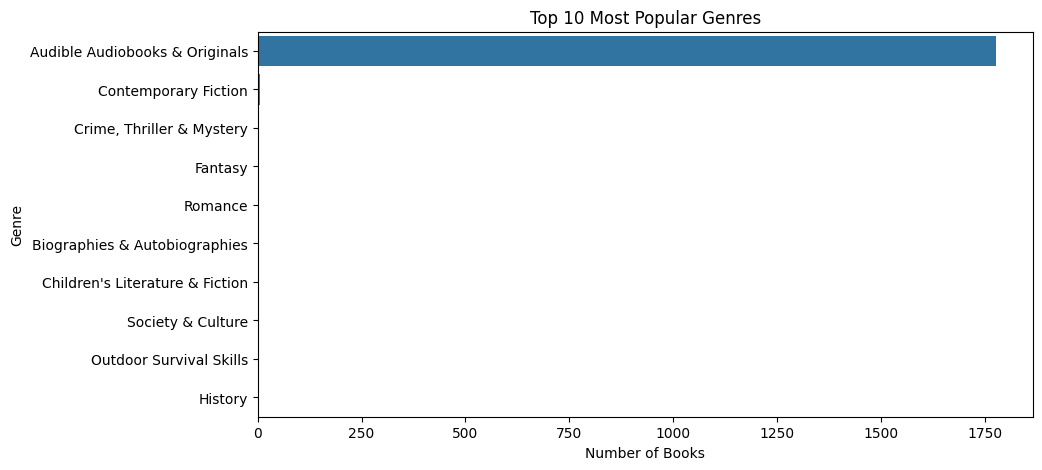

In [15]:
top_genres = df_new['Primary_Genre'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Most Popular Genres")
plt.xlabel("Number of Books")
plt.ylabel("Genre")
plt.show()

In [16]:
top_genres

Primary_Genre
Audible Audiobooks & Originals     1776
Contemporary Fiction                  5
Crime, Thriller & Mystery             4
Fantasy                               4
Romance                               3
Biographies & Autobiographies         3
Children's Literature & Fiction       3
Society & Culture                     2
Outdoor Survival Skills               2
History                               1
Name: count, dtype: int64

2. Which authors have the highest-rated books?

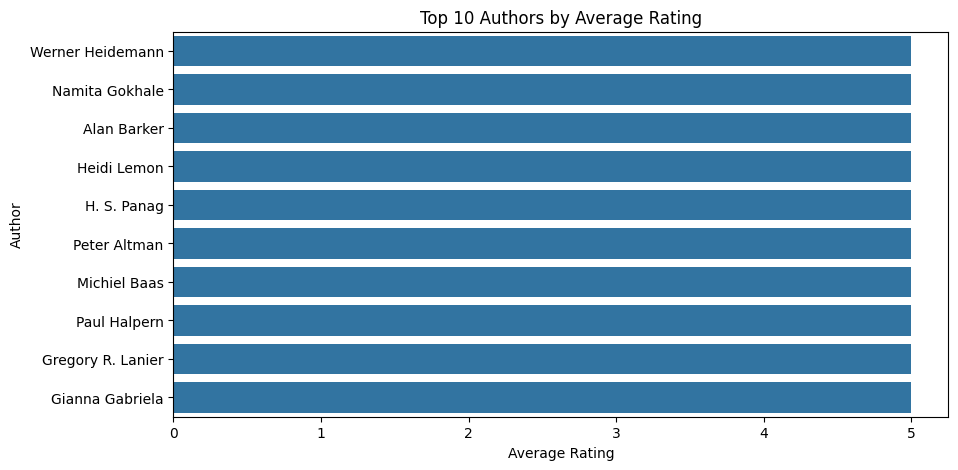

In [17]:
top_authors = df_new.groupby("Author")['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title("Top 10 Authors by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Author")
plt.show()

In [18]:
top_authors

Author
Werner Heidemann     5.0
Namita Gokhale       5.0
Alan Barker          5.0
Heidi Lemon          5.0
H. S. Panag          5.0
Peter Altman         5.0
Michiel Baas         5.0
Paul Halpern         5.0
Gregory R. Lanier    5.0
Gianna Gabriela      5.0
Name: Rating, dtype: float64

3. What is the average rating distribution across books?

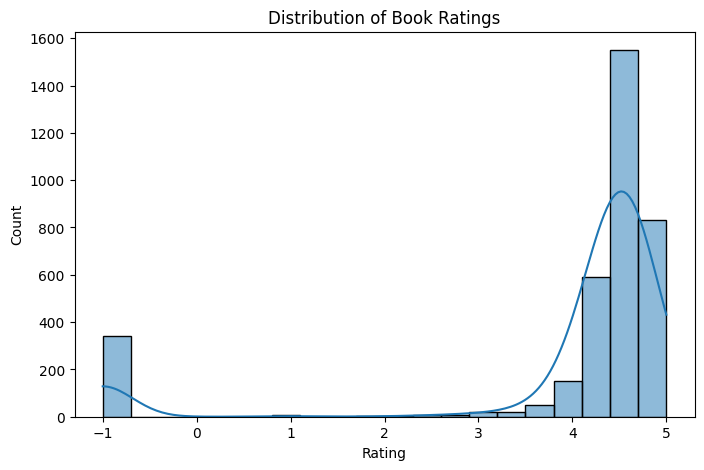

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df_new['Rating'], bins=20, kde=True)
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


5. How do ratings vary between books with different review counts?

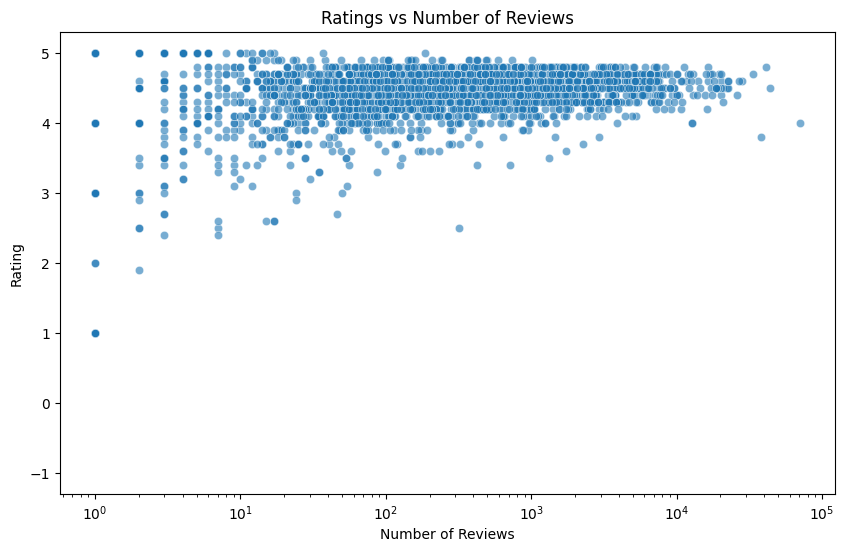

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Number of Reviews', y='Rating', data=df_new, alpha=0.6)
plt.title("Ratings vs Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.xscale("log")  # log scale since review counts vary a lot
plt.show()

## Medium level analysis

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

In [22]:
df_ml = df_new.copy()

1. Which books are frequently clustered together based on descriptions?

In [23]:
# Use TF-IDF on book descriptions
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df_ml['Description'].fillna(""))

# Perform clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You can tune clusters
df_ml['Cluster'] = kmeans.fit_predict(tfidf_matrix)

# Show sample books per cluster
cluster_samples = df_ml.groupby('Cluster')['Book Name'].apply(lambda x: x.head(5).tolist())
print("📚 Sample clustered books:\n", cluster_samples)

📚 Sample clustered books:
 Cluster
0    [Ikigai: The Japanese Secret to a Long and Hap...
1    [Limitless: Upgrade Your Brain, Learn Anything...
2    [Think Like a Monk: The Secret of How to Harne...
3    [Trading in the Zone: Master the Market with C...
4    [The Hard Thing About Hard Things: Building a ...
Name: Book Name, dtype: object


2. How does genre similarity affect book recommendations?

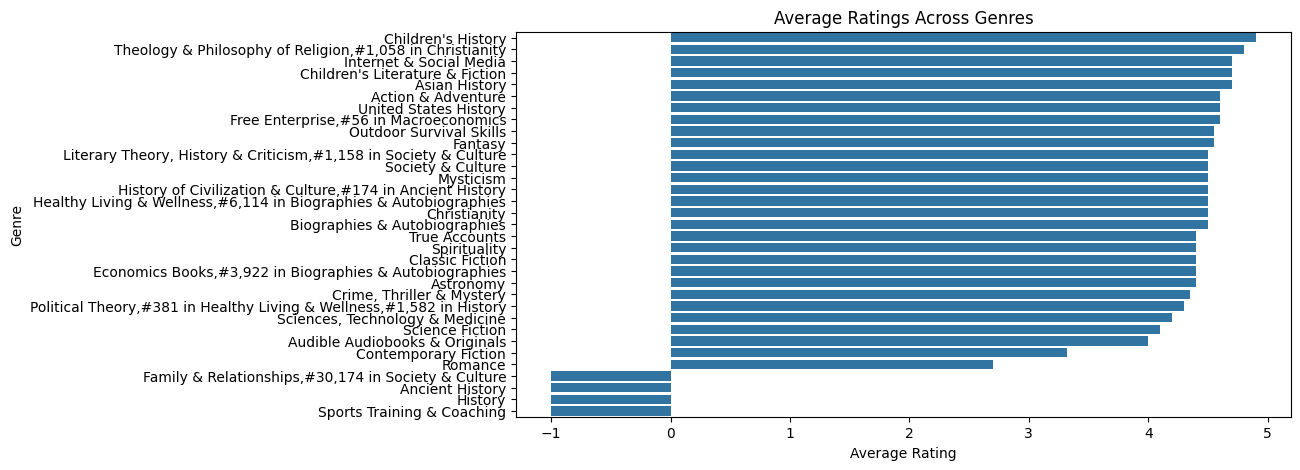

In [24]:
# Compute similarity between genres (simple version: count co-occurrence)
genre_similarity = df_ml.groupby('Primary_Genre')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=genre_similarity.values, y=genre_similarity.index)
plt.title("Average Ratings Across Genres")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()

3. What is the effect of author popularity on book ratings?

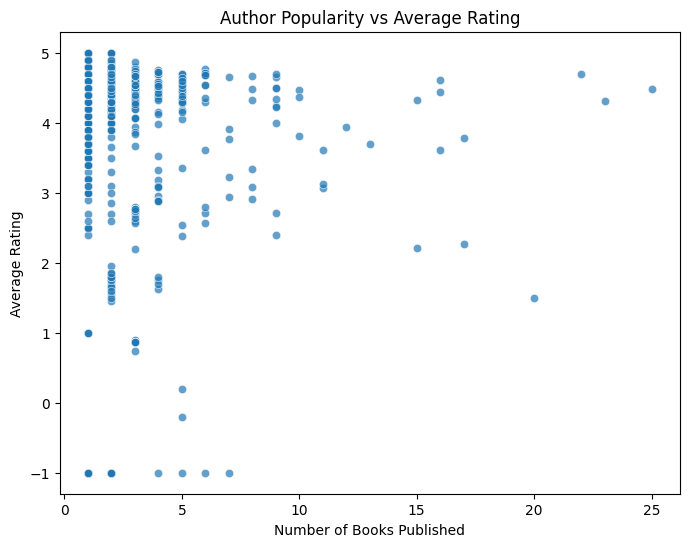

In [25]:
df_ml['Author_Book_Count'] = df_ml.groupby('Author')['Author'].transform('count')
author_popularity = df_ml.groupby('Author')['Author_Book_Count'].mean()
author_ratings = df_ml.groupby('Author')['Rating'].mean()

popularity_df = pd.DataFrame({
    'Books_Published': author_popularity,
    'Avg_Rating': author_ratings
})

plt.figure(figsize=(8,6))
sns.scatterplot(x='Books_Published', y='Avg_Rating', data=popularity_df, alpha=0.7)
plt.title("Author Popularity vs Average Rating")
plt.xlabel("Number of Books Published")
plt.ylabel("Average Rating")
plt.show()

4. Which combination of features provides the most accurate recommendations?

In [26]:
# Try similarity using multiple features (Description + Genre + Author)
df_ml['Combined_Features'] = (
    df_ml['Description'].fillna('') + " " +
    df_ml['Primary_Genre'].fillna('') + " " +
    df_ml['Author'].fillna('')
)

vectorizer2 = TfidfVectorizer(stop_words='english', max_features=10000)
feature_matrix = vectorizer2.fit_transform(df_ml['Combined_Features'])

cosine_sim = cosine_similarity(feature_matrix)

# Example: get recommendations for the first book
book_index = 0
similar_indices = cosine_sim[book_index].argsort()[-6:-1][::-1]  # top 5 recommendations
print("🔍 Base Book:", df_ml.iloc[book_index]['Book Name'])
print("✨ Recommended Books based on combined features:")
for idx in similar_indices:
    print("-", df_ml.iloc[idx]['Book Name'])

🔍 Base Book: Think Like a Monk: The Secret of How to Harness the Power of Positivity and Be Happy Now
✨ Recommended Books based on combined features:
- The Classic Tales Podcast, Season Five
- The Defining Decade: Why Your Twenties Matter and How to Make the Most of Them Now
- Das Think Like a Monk-Prinzip: Finde innere Ruhe und Kraft für ein erfülltes und sinnvolles Leben
- Thank You for Arguing
- The Facebook Effect: The Inside Story of the Company That Is Connecting the World


## Scenario based questions

In [27]:
df_scn = df_ml.copy()

In [28]:
# Prepare Combined Features (for recommendations)
df_scn['Combined_Features'] = (
    df_scn['Description'].fillna('') + " " +
    df_scn['Primary_Genre'].fillna('') + " " +
    df_scn['Author'].fillna('')
)

In [29]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
feature_matrix = vectorizer.fit_transform(df_scn['Combined_Features'])
cosine_sim = cosine_similarity(feature_matrix)

In [30]:
# Helper function: recommend top N similar books
def recommend_books(book_title, n=5):
    if book_title not in df_scn['Book Name'].values:
        print(f"⚠️ '{book_title}' not found in dataset")
        return []
    idx = df_scn[df_scn['Book Name'] == book_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:n+1]
    recommended_books = [df_scn.iloc[i[0]]['Book Name'] for i in sim_scores]
    return recommended_books

1. A new user likes science fiction books → Recommend top 5 books

In [31]:
sci_fi_books = df_scn[df_scn['Primary_Genre'].str.contains("Science Fiction", na=False)]
top_sci_fi = sci_fi_books.sort_values(by="Rating", ascending=False).head(5)
print("🚀 Top 5 Science Fiction Recommendations:")
print(top_sci_fi[['Book Name', 'Author', 'Rating']])

🚀 Top 5 Science Fiction Recommendations:
     Book Name     Author  Rating
1939   Artemis  Andy Weir     4.1


2. For a user who has previously rated thrillers highly → Recommend similar books

In [32]:
thriller_books = df_scn[df_scn['Primary_Genre'].str.contains("Thriller", na=False)]
if not thriller_books.empty:
    base_thriller = thriller_books.iloc[0]['Book Name']  # take one thriller book as base
    rec_thrillers = recommend_books(base_thriller, n=5)
    print(f"\n🔎 Recommendations for Thriller fans (based on '{base_thriller}'):")
    for book in rec_thrillers:
        print("-", book)
else:
    print("\n⚠️ No Thriller books found in dataset.")


🔎 Recommendations for Thriller fans (based on 'The Fountainhead'):
- La pizza: Change ma vie 25
- Business Risk Buster Intervenes At a Hotel: The Truth Revealed About Business Risk 8
- Proven Guilty: The Dresden Files, Book 8
- The Nature of Fear: Fear Is Nothing But Absence of Love
- After 20 Years


3. Identify hidden gems → Highly rated but low popularity

In [33]:
# Define popularity threshold
low_popularity = df_scn['Number of Reviews'] < df_scn['Number of Reviews'].quantile(0.25)
high_rating = df_scn['Rating'] >= 4.5
hidden_gems = df_scn[low_popularity & high_rating].sort_values(by="Rating", ascending=False).head(10)

print("\n💎 Hidden Gems (High Rating, Low Popularity):")
print(hidden_gems[['Book Name', 'Author', 'Rating', 'Number of Reviews']])


💎 Hidden Gems (High Rating, Low Popularity):
                                             Book Name  \
12                                         The Sandman   
17          Sherlock Holmes: The Definitive Collection   
319  No Calculator? No Problem!: Mastering Mental Math   
322  Satyajit Ray Ki Kahaniyan [Stories of Satyajit...   
374  50 Self-Help Classics to Guide You to Financia...   
350                      The Ultimate Jim Rohn Library   
495  Midnight's Children: BBC Radio 4 full-cast dra...   
387  Learn Spanish with Innovative Language's Prove...   
568  Mysteries of the Universe: Answerable and Unan...   
606  Muscular India: Masculinity, Mobility & the Ne...   

                           Author  Rating  Number of Reviews  
12                    Neil Gaiman     5.0                1.0  
17             Arthur Conan Doyle     5.0                6.0  
319                  Art Benjamin     5.0                1.0  
322                  Satyajit Rai     5.0                1.0  


In [34]:
df_scn.head()

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre,Primary_Genre,Cluster,Author_Book_Count,Combined_Features
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,371.0,10080,"Over the past three years, Jay Shetty has beco...",10 hours and 54 minutes,",#1 in Audible Audiobooks & Originals (See Top...",Audible Audiobooks & Originals,2,2,"Over the past three years, Jay Shetty has beco..."
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3682.0,615,Brought to you by Penguin.,3 hours and 23 minutes,",#2 in Audible Audiobooks & Originals (See Top...",Audible Audiobooks & Originals,0,2,Brought to you by Penguin. Audible Audiobooks ...
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20306.0,10378,"In this generation-defining self-help guide, a...",5 hours and 17 minutes,",#3 in Audible Audiobooks & Originals (See Top...",Audible Audiobooks & Originals,2,4,"In this generation-defining self-help guide, a..."
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4678.0,888,Brought to you by Penguin.,5 hours and 35 minutes,",#5 in Audible Audiobooks & Originals (See Top...",Audible Audiobooks & Originals,0,1,Brought to you by Penguin. Audible Audiobooks ...
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4308.0,1005,"Stop going through life, Start growing throug...",6 hours and 25 minutes,",#6 in Audible Audiobooks & Originals (See Top...",Audible Audiobooks & Originals,2,1,"Stop going through life, Start growing throug..."
